In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("C://Users//AbdelRahman//Desktop//Eleveoo Pathways Internship//loan_approval_dataset.csv")
print("Dataset Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

Dataset Shape: (4269, 13)
Missing values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# --- 1. Data cleaning ---
df.columns = df.columns.str.strip()  # remove spaces in column names
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()  # remove spaces in string values

In [7]:
encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

print("\nColumns and dtypes after encoding:")
print(df.dtypes)
print("\nClass distribution (target = 'loan_status'):\n", df['loan_status'].value_counts())



Columns and dtypes after encoding:
loan_id                     int64
no_of_dependents            int64
education                   int32
self_employed               int32
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int32
dtype: object

Class distribution (target = 'loan_status'):
 loan_status
0    2656
1    1613
Name: count, dtype: int64


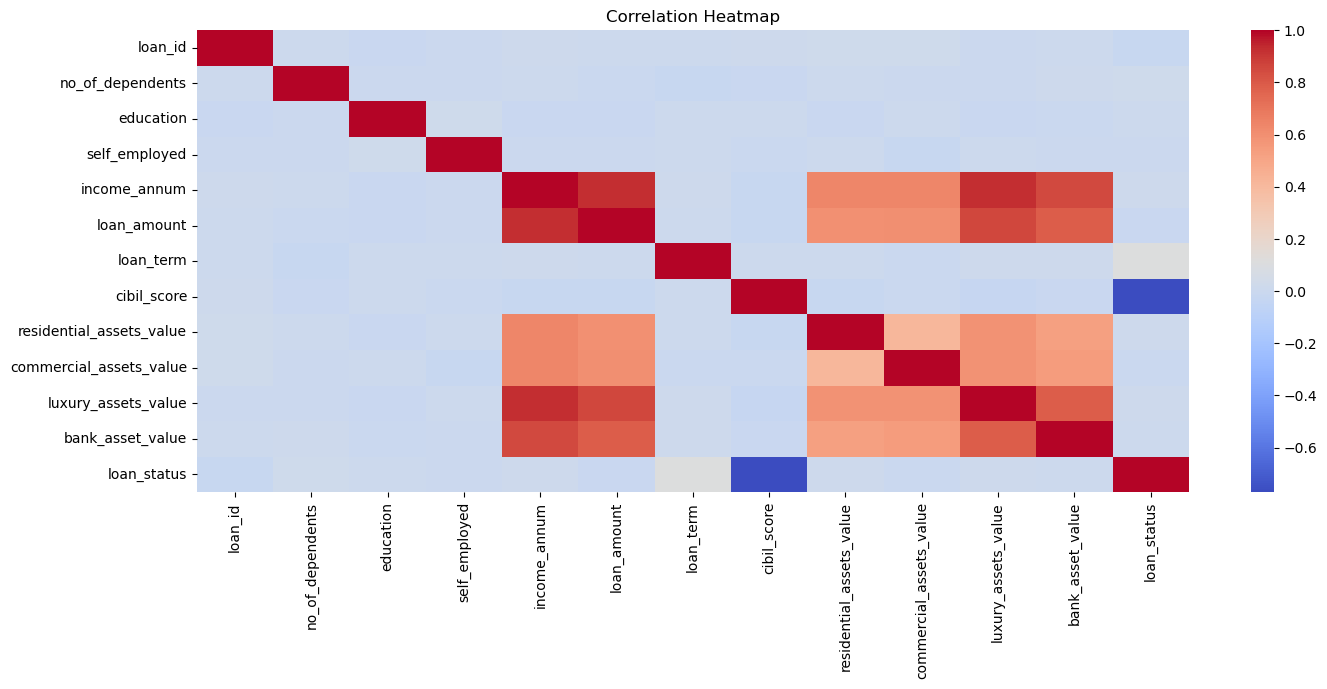

In [8]:
# Correlation heatmap
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# --- 3. Train/test split ---
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
# Scaling for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# --- Utility function for metrics ---
def evaluate_and_print(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n{name} -- Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}


In [12]:
# --- 4. Train models (before SMOTE) ---
print("\n--- Training on original (imbalanced) data ---")
log = LogisticRegression(max_iter=2000)
tree = DecisionTreeClassifier(random_state=42)

log.fit(X_train_scaled, y_train)
tree.fit(X_train, y_train)

y_pred_log = log.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test)

metrics_before = {
    'Logistic': evaluate_and_print("Logistic Regression (before SMOTE)", y_test, y_pred_log),
    'Tree': evaluate_and_print("Decision Tree (before SMOTE)", y_test, y_pred_tree)
}



--- Training on original (imbalanced) data ---

Logistic Regression (before SMOTE) -- Accuracy: 0.9215, Precision: 0.9156, Recall: 0.8731, F1: 0.8938
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       531
           1       0.92      0.87      0.89       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854

Confusion Matrix:
 [[505  26]
 [ 41 282]]

Decision Tree (before SMOTE) -- Accuracy: 0.9766, Precision: 0.9810, Recall: 0.9567, F1: 0.9687
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Confusio

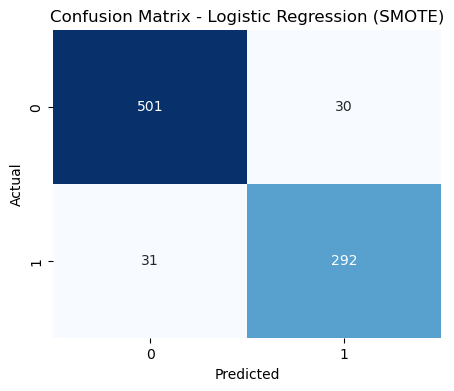

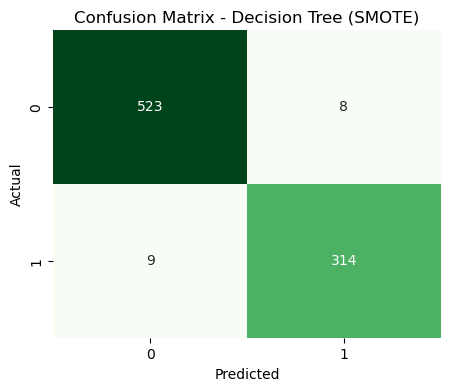

In [19]:
# Confusion matrices
cm_log = confusion_matrix(y_test, y_pred_log_sm)
cm_tree = confusion_matrix(y_test, y_pred_tree_sm)

# Plot Logistic Regression confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Decision Tree confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Decision Tree (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

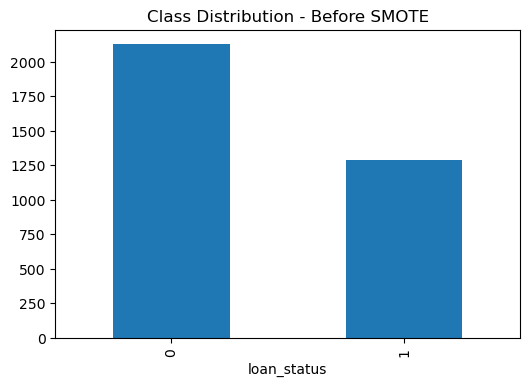

In [13]:
plt.figure(figsize=(6,4))
y_train.value_counts().plot(kind="bar")
plt.title("Class Distribution - Before SMOTE")
plt.show()



After SMOTE class distribution (train):
 [2125 2125]


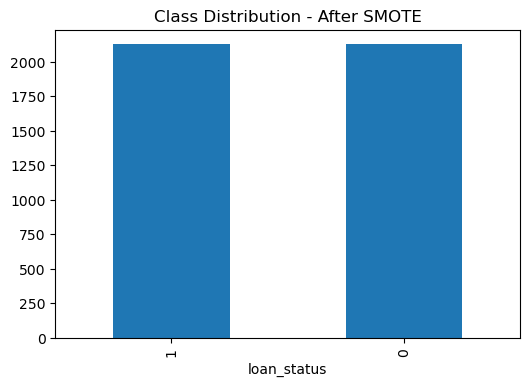

In [14]:
# --- 5. Apply SMOTE ---
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE class distribution (train):\n", np.bincount(y_train_res.astype(int)))

X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled_for_res = scaler.transform(X_test)

plt.figure(figsize=(6,4))
pd.Series(y_train_res).value_counts().plot(kind="bar")
plt.title("Class Distribution - After SMOTE")
plt.show()

In [15]:
# --- 6. Train models (after SMOTE) ---
log_sm = LogisticRegression(max_iter=2000)
tree_sm = DecisionTreeClassifier(random_state=42)

log_sm.fit(X_train_res_scaled, y_train_res)
tree_sm.fit(X_train_res, y_train_res)

y_pred_log_sm = log_sm.predict(X_test_scaled_for_res)
y_pred_tree_sm = tree_sm.predict(X_test)

metrics_after = {
    'Logistic': evaluate_and_print("Logistic Regression (after SMOTE)", y_test, y_pred_log_sm),
    'Tree': evaluate_and_print("Decision Tree (after SMOTE)", y_test, y_pred_tree_sm)
}


Logistic Regression (after SMOTE) -- Accuracy: 0.9286, Precision: 0.9068, Recall: 0.9040, F1: 0.9054
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       531
           1       0.91      0.90      0.91       323

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854

Confusion Matrix:
 [[501  30]
 [ 31 292]]

Decision Tree (after SMOTE) -- Accuracy: 0.9801, Precision: 0.9752, Recall: 0.9721, F1: 0.9736
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[523   8]
 [  9 314]]


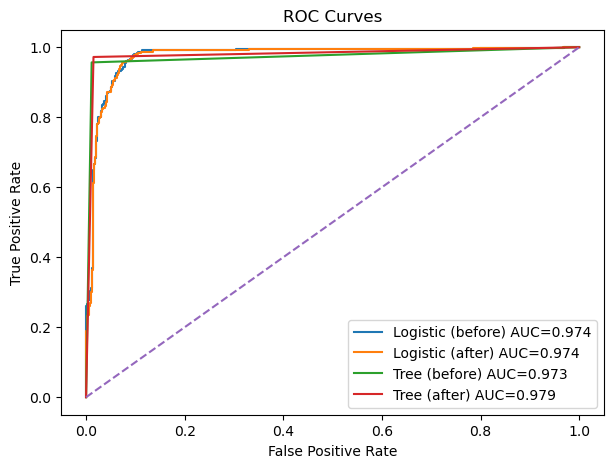

In [16]:
# --- 7. ROC Curves ---
plt.figure(figsize=(7,5))
models = [
    ("Logistic (before)", log, X_test_scaled),
    ("Logistic (after)", log_sm, X_test_scaled_for_res),
    ("Tree (before)", tree, X_test),
    ("Tree (after)", tree_sm, X_test),
]

for label, model, X_eval in models:
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_eval)[:,1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} AUC={roc_auc:.3f}")

plt.plot([0,1],[0,1], linestyle='--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

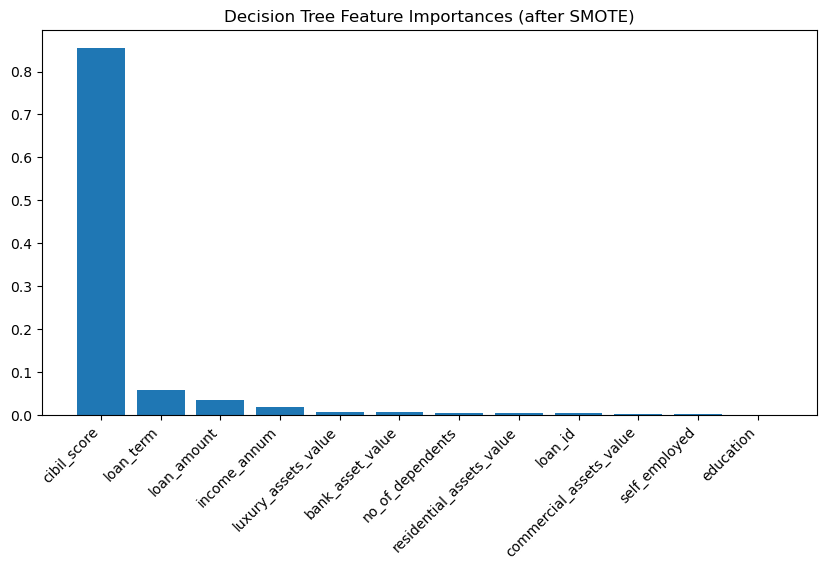

In [17]:
# --- 8. Feature importance (Tree after SMOTE) ---
importances = tree_sm.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feat_names[indices], rotation=45, ha="right")
plt.title("Decision Tree Feature Importances (after SMOTE)")
plt.show()


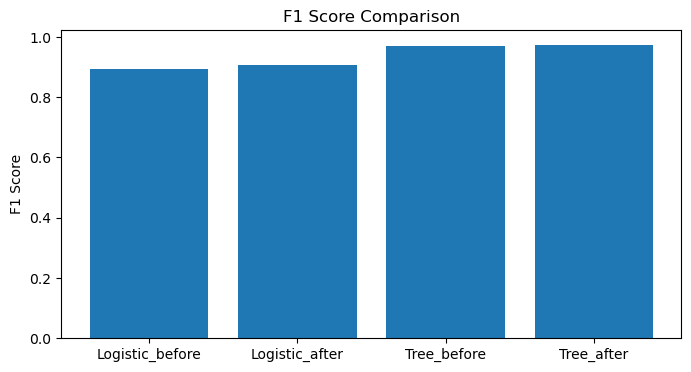

In [18]:
# --- 9. Compare F1 scores ---
f1_values = [
    metrics_before['Logistic']['f1'],
    metrics_after['Logistic']['f1'],
    metrics_before['Tree']['f1'],
    metrics_after['Tree']['f1']
]

plt.figure(figsize=(8,4))
plt.bar(['Logistic_before','Logistic_after','Tree_before','Tree_after'], f1_values)
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()
